In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(
    style="darkgrid",
    palette="pastel"
)

import koreanize_matplotlib

In [2]:
df = pd.read_csv('seoul_apart_02.csv')
df.head()

,시군구,단지명,전용면적(평),계약년월,계약일,거래금액(만원),층,건축년도,구,동,유형,계약월,계약요일,평당금액
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202204,2022.4.12,220000,4,1987.0,강남구,개포동,중형,4,화,9079.65
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202204,2022.4.21,220000,2,1987.0,강남구,개포동,중형,4,목,9079.65
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202205,2022.5.27,216000,2,1987.0,강남구,개포동,중형,5,금,8914.57
3,서울특별시 강남구 개포동,개포래미안포레스트,31.01,202204,2022.4.1,369000,13,2020.0,강남구,개포동,대형,4,금,11899.39
4,서울특별시 강남구 개포동,개포래미안포레스트,41.23,202205,2022.5.2,420000,17,2020.0,강남구,개포동,대형,5,월,10186.76


### 전체 데이터의 거래금액을 히스토그램으로 그려보기

* sns.histplot() 사용
* 인자는 data, bins만 사용
* bins는 30으로 설정

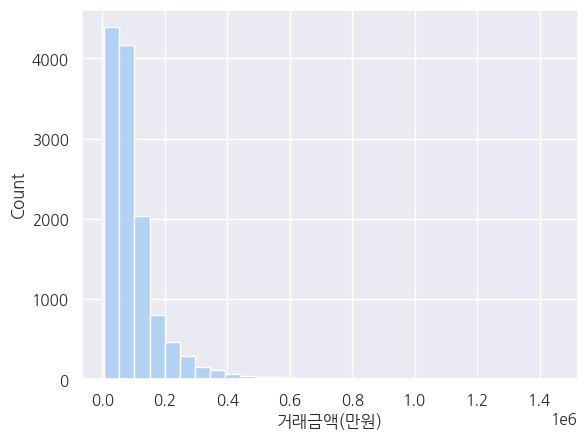

In [3]:
sns.histplot(data=df['거래금액(만원)'], bins=30)
plt.show()

In [4]:
# 월별 부동산 거래의 평당금액 평균값 확인
mon_price = df.groupby('계약월')[['평당금액']].mean()
mon_price

,평당금액
계약월,
1,4462.213910
2,4438.818763
3,4711.707969
4,4980.187903
5,4644.528567
6,4733.806339
7,4451.753745
8,4197.408477
9,3906.256034


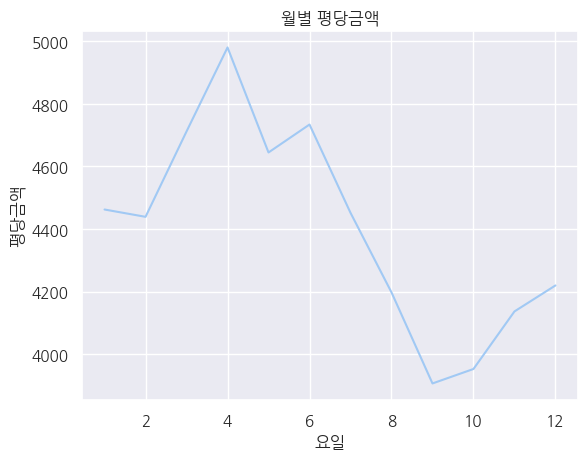

In [5]:
plt.title('월별 평당금액')
plt.plot(mon_price['평당금액'])
plt.xlabel('요일')
plt.ylabel('평당금액')
plt.show()

## 월별 아파트 실거래 계약건수를 막대그래프로 그려보자
* sns.countplot() 활용
* 인자는 data, x만 사용

<Axes: xlabel='계약월', ylabel='count'>

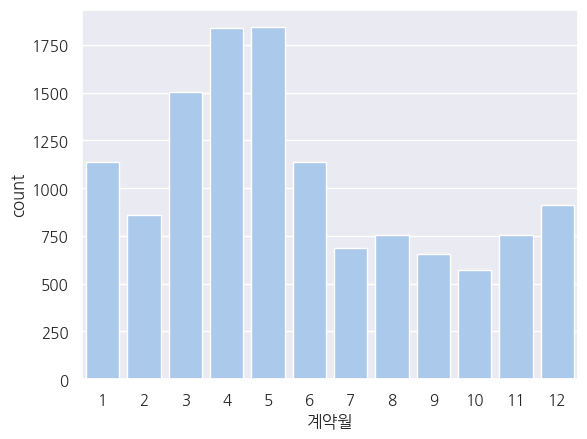

In [6]:
sns.countplot(data=df,x='계약월')

<Axes: xlabel='평당금액', ylabel='Count'>

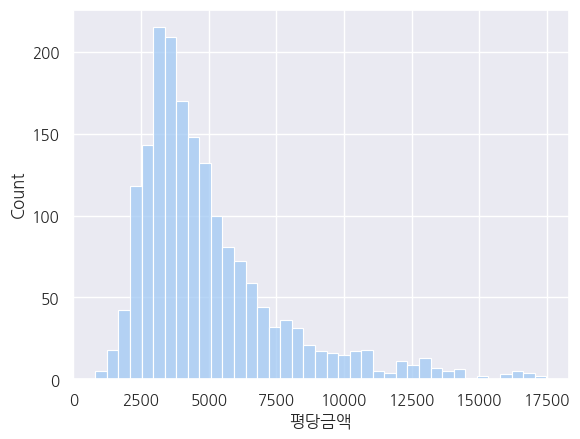

In [7]:
# 4월에 거래된 매물의 평당금액의 분포를 히스토그램으로 그리기
sns.histplot(data=df[df['계약월']==4]['평당금액'])

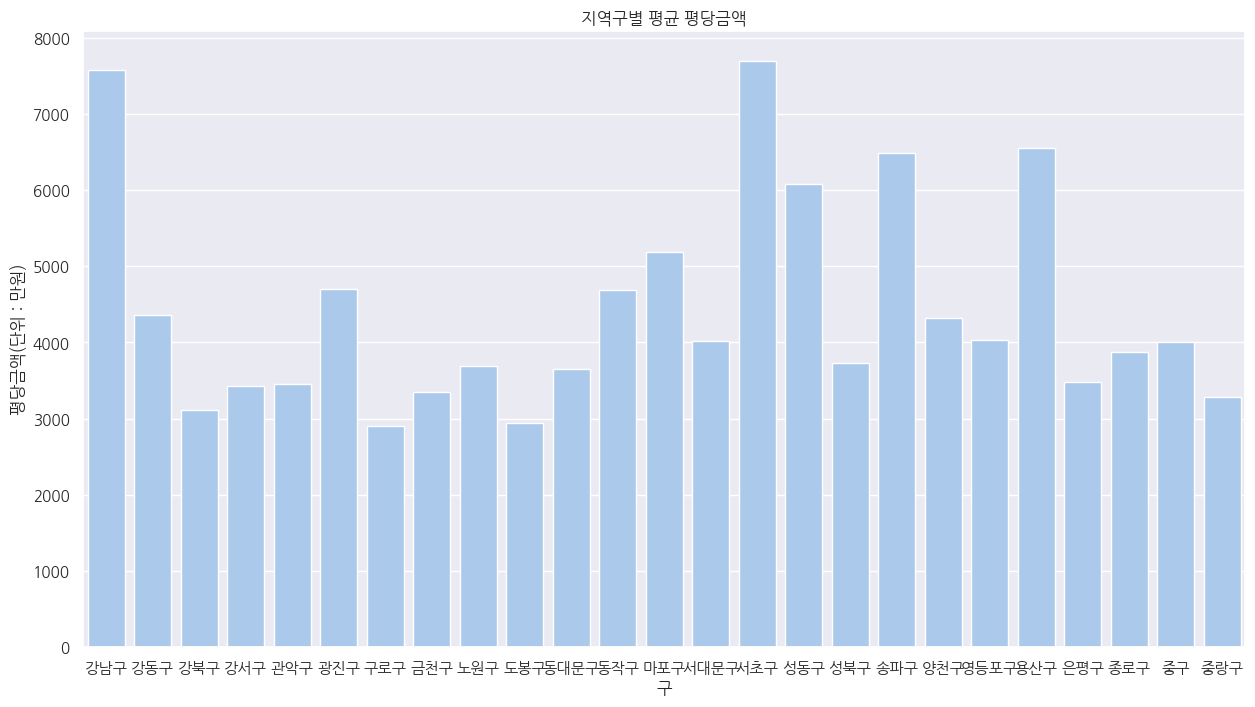

In [8]:
# 지역(구)별 거래금액을 비교하기 위한 막대그래프
df.head()
plt.figure(figsize=(15,8))
plt.title('지역구별 평균 평당금액')
sns.barplot(data=df, x='구',y='평당금액',errorbar=None)
plt.ylabel('평당금액(단위 : 만원)')
plt.show()

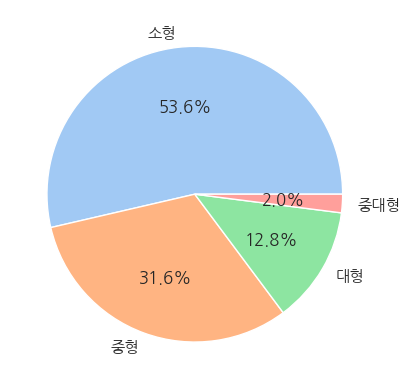

In [9]:
# 파이차트로 유형 비율 확인
type_ratio = df['유형'].value_counts()
type_ratio
plt.pie(x=type_ratio, labels=type_ratio.index, autopct='%1.1f%%')
plt.show()

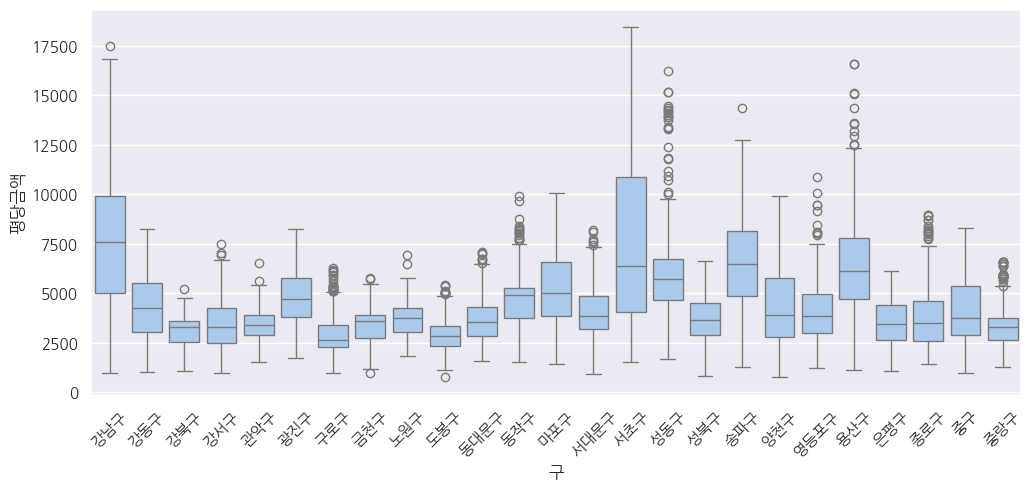

In [10]:
# 지역구별 평당금액을 박스플롯으로 그리기
plt.figure(figsize=(12,5))
plt.xticks(rotation=45)
sns.boxplot(data=df, x='구',y='평당금액')

plt.show()

### '전용면적(평)" 컬럼과 "거래금액(만원)" 컬럼의 상관관계를 산점도로 그리기
* sns.scatterplot()사용

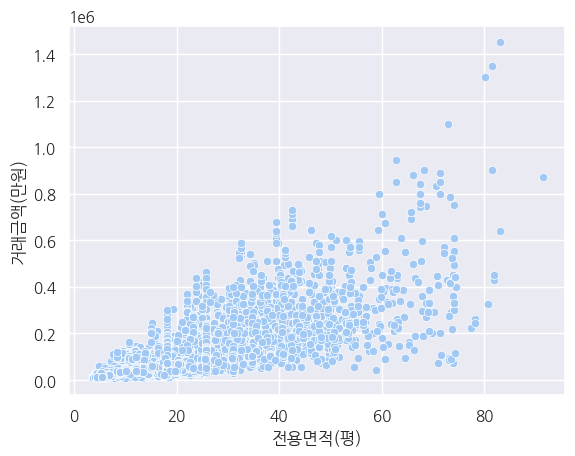

In [11]:
sns.scatterplot(data=df, x='전용면적(평)',y='거래금액(만원)')

plt.show()

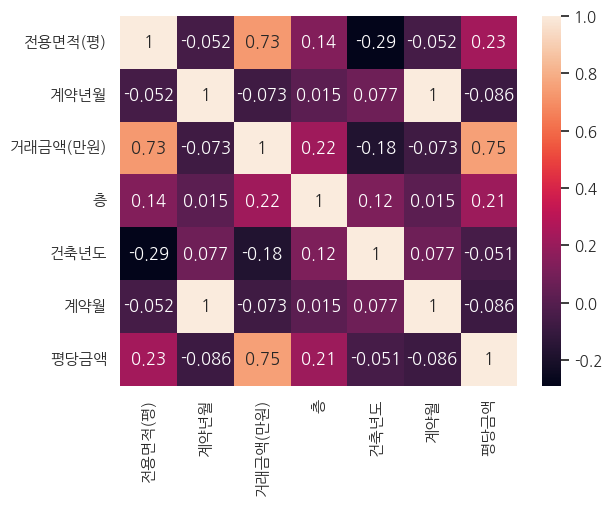

In [ ]:
# 전체 수치형 데이터끼리의 상관계수를 히트맵으로 표현
df_corr = df.corr(numeric_only=True)
df_corr
sns.heatmap(df_corr,annot=True)

plt.show()